**Harris Corner Direction**:

Unlike edges, corners pixels have high difference in all direction

WSSD(weighted sum of square difference) but with small patch
* E = sum_for_all_pixels_i(w(i) * [I(xi + u, yi + v) - I(xi, yi)

Using Taylor Expansion: I(x + u, y + v) = I(x, y) + I’(x, y) * u + I’(x, y) * v

refer: https://en.wikipedia.org/wiki/Harris_Corner_Detector

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
!wget 'https://pmctvline2.files.wordpress.com/2018/02/family-guy-stewie.jpg'
i_img_path = 'family-guy-stewie.jpg'

--2020-07-28 11:40:26--  https://pmctvline2.files.wordpress.com/2018/02/family-guy-stewie.jpg
Resolving pmctvline2.files.wordpress.com (pmctvline2.files.wordpress.com)... 192.0.72.26, 192.0.72.27
Connecting to pmctvline2.files.wordpress.com (pmctvline2.files.wordpress.com)|192.0.72.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98136 (96K) [image/jpeg]
Saving to: ‘family-guy-stewie.jpg.1’

family-guy-stewie.j 100%[===================>]  95.84K  --.-KB/s    in 0.03s   

2020-07-28 11:40:26 (3.08 MB/s) - ‘family-guy-stewie.jpg.1’ saved [98136/98136]



Text(0.5, 1.0, 'Harris Corners')

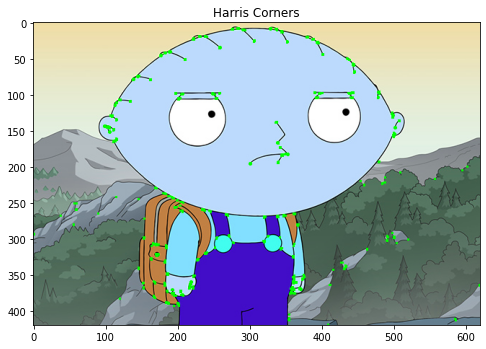

In [36]:
# Harris Detector OpenCV
img = cv2.imread(i_img_path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

h = cv2.cornerHarris(gray, 2, 3, 0.07)
h = cv2.dilate(h,None)

#apply threshold, may depend on the image
img[h > 0.01 * h.max()] = [0,255,0]

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(8, 12)
axs.imshow(img); axs.set_title('Harris Corners')